
# Practical Introduction to Deep Learning Basics

In [ ]:

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


## Load Data

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() # marenoustrum, no se puede acceder
#(x_train, y_train), (x_test, y_test) = mnist.load_data(path='/gpfs/projects/nct00/nct00002/basics-utils/mnist.npz')

11490434/11490434 [==============================] - 0s 0us/step


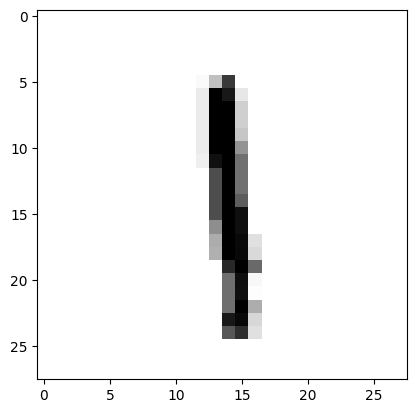

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)



In [ ]:
print(y_train[8])

1


In [ ]:
print(x_train.ndim)

3


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_train.dtype)

uint8


## Prepare data

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
print(y_test[0])

7


In [ ]:
print(y_train[0])

5


In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
print(x_test.shape)

(10000, 784)


In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(y_test[0])


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(y_train.shape)

(60000, 10)


In [ ]:
print(y_test.shape)

(10000, 10)


## Define Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile model (configuration)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])


## Training the model

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.8535 - accuracy: 0.5491
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2263 - accuracy: 0.7544
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8969 - accuracy: 0.8127
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7285 - accuracy: 0.8427
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6281 - accuracy: 0.8589


## Evaluation the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5793 - accuracy: 0.8697


In [ ]:
print('Test accuracy:', test_acc)

Test accuracy: 0.869700014591217


In [ ]:
# Look at confusion matrix
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 1ms/step


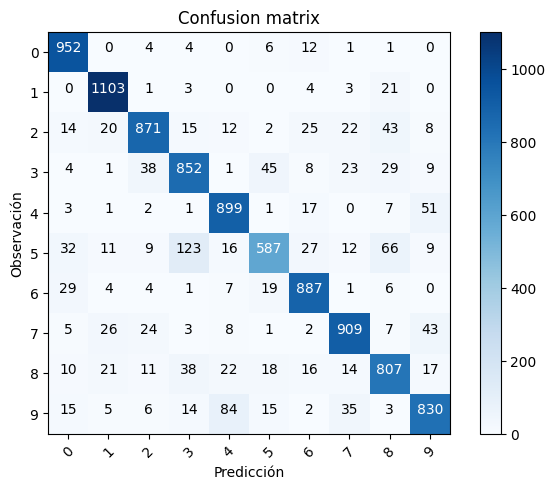

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

## Use the model

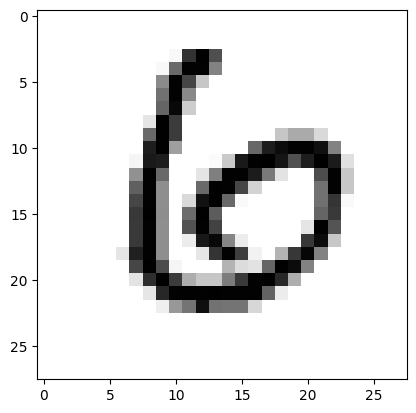

In [ ]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
np.argmax(predictions[11])

6

In [ ]:
print(predictions[11])

[0.07403243 0.02090711 0.21468367 0.05238643 0.0418337  0.05873876
 0.39941505 0.00560606 0.12446319 0.00793364]


In [ ]:
np.sum(predictions[11])

1.0

# Model 2

In [ ]:
model_2 = Sequential()
model_2.add(Dense(48, activation='sigmoid', input_shape=(784,)))
model_2.add(Dense(10, activation='sigmoid', input_shape=(48,)))
model_2.add(Dense(10, activation='softmax'))

In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 48)                37680     
                                                                 
 dense_9 (Dense)             (None, 10)                490       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
Total params: 38280 (149.53 KB)
Trainable params: 38280 (149.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])


In [ ]:
model_2.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2636 - accuracy: 0.2124
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0656 - accuracy: 0.3555
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7168 - accuracy: 0.5006
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3727 - accuracy: 0.6585
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1180 - accuracy: 0.7306
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9484 - accuracy: 0.7756
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8263 - accuracy: 0.8053
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7348 - accuracy: 0.8253
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6655 - accuracy: 0.8388
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.611

In [ ]:
test_loss, test_acc = model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3588 - accuracy: 0.9063


In [ ]:
print('Test accuracy:', test_acc)

Test accuracy: 0.9063000082969666


313/313 [==============================] - 1s 2ms/step


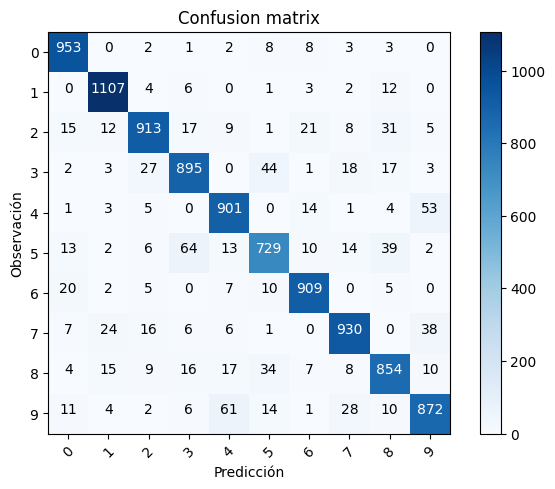

In [ ]:
# Predict the values from the validation dataset
Y_pred = model_2.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# Model 2 - Adam

In [ ]:
model_2_adam = Sequential()
model_2_adam.add(Dense(48, activation='sigmoid', input_shape=(784,)))
model_2_adam.add(Dense(10, activation='sigmoid', input_shape=(48,)))
model_2_adam.add(Dense(10, activation='softmax'))

In [ ]:
model_2_adam.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 48)                37680     
                                                                 
 dense_15 (Dense)            (None, 10)                490       
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
Total params: 38280 (149.53 KB)
Trainable params: 38280 (149.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2_adam.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])


In [ ]:
model_2_adam.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.9694 - accuracy: 0.8031
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3395 - accuracy: 0.9199
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2334 - accuracy: 0.9398
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1845 - accuracy: 0.9502
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1525 - accuracy: 0.9591
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1298 - accuracy: 0.9650
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1121 - accuracy: 0.9698
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0990 - accuracy: 0.9732
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0880 - accuracy: 0.9762
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.07

In [ ]:
test_loss, test_acc = model_2_adam.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1066 - accuracy: 0.9692


In [ ]:
print('Test accuracy:', test_acc)

Test accuracy: 0.9692000150680542


313/313 [==============================] - 1s 2ms/step


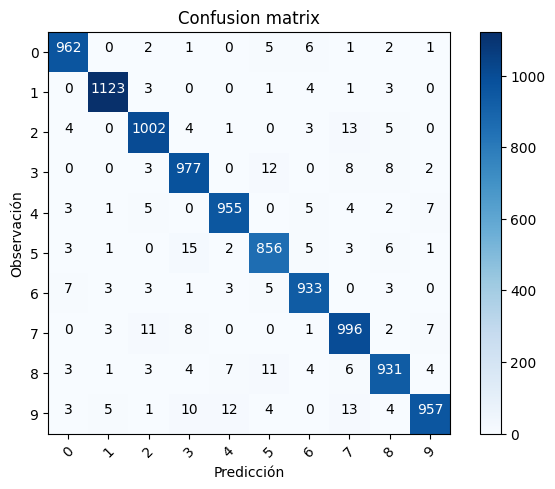

In [ ]:
# Predict the values from the validation dataset
Y_pred = model_2_adam.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# Convolutional Neural Network


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))



from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 10)              

In [ ]:
from tensorflow.keras.utils import to_categorical

#mnist = tf.keras.datasets.mnist(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path='/gpfs/projects/nct00/nct00002/basics-utils/mnist.npz')

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=100, epochs=5, verbose=1)

Epoch 1/5
600/600 [==============================] - 7s 4ms/step - loss: 0.8888 - accuracy: 0.7646
Epoch 2/5
600/600 [==============================] - 3s 4ms/step - loss: 0.2545 - accuracy: 0.9258
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.1829 - accuracy: 0.9466
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.1462 - accuracy: 0.9577
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.1238 - accuracy: 0.9643


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9702
Test accuracy: 0.9702000021934509


# Convolutional Neural Network 2


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu',padding='same'))


from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 4, 4, 128)         204928    
                                                                 
 flatten_5 (Flatten)         (None, 2048)            

In [ ]:
from tensorflow.keras.utils import to_categorical

#mnist = tf.keras.datasets.mnist(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path='/gpfs/projects/nct00/nct00002/basics-utils/mnist.npz')

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=100, epochs=10, verbose=1)

Epoch 1/10
600/600 [==============================] - 4s 4ms/step - loss: 0.1498 - accuracy: 0.9553
Epoch 2/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0408 - accuracy: 0.9874
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0281 - accuracy: 0.9912
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0200 - accuracy: 0.9935
Epoch 5/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0159 - accuracy: 0.9952
Epoch 6/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0115 - accuracy: 0.9964
Epoch 7/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0103 - accuracy: 0.9969
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0095 - accuracy: 0.9970
Epoch 9/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0086 - accuracy: 0.9972
Epoch 10/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0065 - accuracy: 0.9978

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0349 - accuracy: 0.9919
Test accuracy: 0.9919000267982483
